# Social Influence Modeling in Networks
## ---- Estimating and Embedding Heavy-Tailed Networks
#### Code 2 : Spectral Embedding for Small Dataset

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math, powerlaw
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from itertools import count
import csv
import warnings
warnings.filterwarnings("ignore")

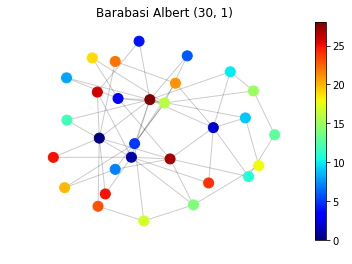

In [2]:
def draw_heat(ba, n):
    A = nx.adjacency_matrix(ba, nodelist=None).todense()
    pca = PCA(n_components=10)
    pca.fit(A)
    pcs = np.matmul(pca.components_, A.tolist())[n]
    for i in range(len(ba.nodes())):
        ba.node[i]['weight'] = pcs[i]
    groups = set(nx.get_node_attributes(ba,'weight').values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = ba.nodes()
    colors = [mapping[ba.node[n]['weight']] for n in nodes]
    pos = nx.spring_layout(ba)
    ec = nx.draw_networkx_edges(ba, pos, alpha=0.2)
    nc = nx.draw_networkx_nodes(ba, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=100, cmap=plt.cm.jet)
    plt.colorbar(nc)
    plt.axis('off')
    plt.title("Barabasi Albert (30, 1)")
    plt.savefig("./img/spectral.pdf")
    plt.show()
    

    
draw_heat(nx.barabasi_albert_graph(30, 2), 0)

Analyze why Spectral-based Method is not suitable for large network with heavy-tailed property.

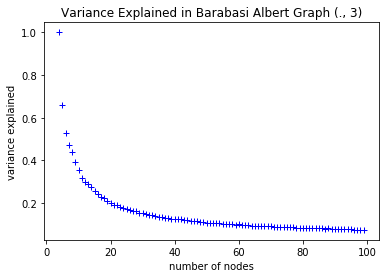

In [3]:
ma = []
for k in range(4, 100):
    a = []
    for i in range(100):
        A = nx.adjacency_matrix(nx.barabasi_albert_graph(k, 3), nodelist=None)
        pca = PCA(n_components=1)
        pca.fit(A.todense())
        a.append(pca.explained_variance_ratio_[0])
    ma.append(np.mean(a))

    
plt.plot(range(4,100), ma, 'b+')
plt.title("Variance Explained in Barabasi Albert Graph (., 3)")
plt.xlabel("number of nodes")
plt.ylabel("variance explained")
plt.savefig("./img/spectral.pdf")
plt.show()